<a href="https://colab.research.google.com/github/danielruizm16/ComputationalMethods/blob/main/Basics/basic_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Approximation for $\ln(x)$

The natural logarithm of $(1 + x)$ can be approximated using the Maclaurin series (Taylor series centered at 0):
$$
\ln(1 + x) = \sum_{n=1}^{\infty} \frac{(-1)^{n+1} \cdot x^n}{n} = x - \frac{x^2}{2} + \frac{x^3}{3} - \frac{x^4}{4} + \cdots \quad \text{(valid for } -1 < x \leq 1\text{)}
$$


- Implement a Python function that calculates this approximation for a value $x$ in the range $(-1, 1]$ and a number of terms $N$.
- Compare the result with the actual value of $\ln(1 + x)$ (using $\texttt{math.log(1 + x)}$).



In [2]:
def ln_approx(x, N):
    """
    Approximate ln(1 + x) using Maclaurin series expansion
    
    Args:
        x: Input value (must be in range -1 < x ≤ 1)
        N: Number of terms to use in the approximation
    
    Returns:
        Approximation of ln(1 + x) using N terms
    """
    if x <= -1 or x > 1:
        raise ValueError("x must be in the range (-1, 1]")
    
    approximation = 0.0
    for n in range(1, N + 1):
        term = ((-1) ** (n + 1)) * (x ** n) / n
        approximation += term
    
    return approximation

In [3]:
x=0.5
N=10

real_ln = math.log(1 + x)
approx_ln = ln_approx(x, N)
error = abs(approx_ln - real_ln)
error_percent = (error / abs(real_ln)) * 100 

print(f"Actual ln(1 + {x}) = {real_ln:.10f}")
print(f"N = {N:2d}: {real_ln:.10f} | Error: {error:.2e} ({error_percent:.4f}%)")

Actual ln(1 + 0.5) = 0.4054651081
N = 10: 0.4054651081 | Error: 3.05e-05 (0.0075%)


# Polar Coordinates

Suppose the position of a point in two-dimensional space is given to us in polar coordinates $r, \theta$ and we want to convert it to Cartesian coordinates $x, y$. How would we write a program to do this? The appropriate steps are:
- Ask the user to enter the values of $r$ and $\theta$.
- Convert these values to Cartesian coordinates using the standard formulas:
$$
x = r \cos \theta , \quad y = r \sin \theta. 
$$
- Print the results.

Write a program that performs the inverse operation. That is, ask the user for the Cartesian coordinates $x, y$ of a point in two-dimensional space, calculate and print the corresponding polar coordinates, with the angle $\theta$ given in degrees.

In [4]:
# Ask the user for values of r and theta (in degrees)
r = float(input("Enter the value of r (radius): "))
theta_deg = float(input("Enter the value of θ (angle in degrees): "))

# Convert the angle to radians
theta_rad = theta_deg * np.pi / 180

# Calculate x and y
x = r * np.cos(theta_rad)
y = r * np.sin(theta_rad)

# Print the results
print(f"Cartesian coordinates: x = {x:.2f}, y = {y:.2f}")



Cartesian coordinates: x = 1.73, y = 1.00


In [5]:
# Ask the user for values of x and y
x = float(input("Enter the value of x: "))
y = float(input("Enter the value of y: "))

# Calculate r and theta (in radians first)
r = np.sqrt(x**2 + y**2)
theta_rad = np.atan2(y, x)  # Use atan2 to handle all quadrants

# Convert theta to degrees
theta_deg = theta_rad * 180 / np.pi

# Print the results
print(f"Polar coordinates: r = {r:.2f}, θ = {theta_deg:.2f}°")

Polar coordinates: r = 2.00, θ = 0.00°


# Factorial
Write a program that calculates the factorial of a given number.

In [7]:
def factorial_recursive(n):
    """Calculate factorial using recursion"""
    if n < 0:
        return "Factorial is not defined for negative numbers"
    elif n == 0 or n == 1:
        return 1
    else:
        return n * factorial_recursive(n - 1)

# Catalan Numbers
Catalan numbers $C_n$ are a sequence of integers 1, 1, 2, 5, 14, 42, 132... that play an important role in quantum mechanics and the theory of disordered systems. (They were fundamental in Eugene Wigner's proof of the so-called semicircle law). These numbers are given by:

$$C_0 = 1, \quad C_{n+1} = \frac{4n + 2}{n + 2} \, C_n.$$

Write a program that prints in increasing order all Catalan numbers less than or equal to ten million.

In [16]:
def catalan_numbers_up_to_limit(limit):
    """
    Generate Catalan numbers up to a maximum value 
    """
    n = 0
    C = 1  # C_0 = 1
    print(f"C_{n} = {C}")
    
    while True:
        next_C = C * (4 * n + 2) // (n + 2)
        if next_C > limit:
            break
        n += 1
        C = next_C
        print(f"C_{n} = {C}")

catalan_numbers_up_to_limit(1e7)

C_0 = 1
C_1 = 1
C_2 = 2
C_3 = 5
C_4 = 14
C_5 = 42
C_6 = 132
C_7 = 429
C_8 = 1430
C_9 = 4862
C_10 = 16796
C_11 = 58786
C_12 = 208012
C_13 = 742900
C_14 = 2674440
C_15 = 9694845


# Plotting Functions in the $xy$-Plane

Plot the functions $y_1(x) = 3 + e^{-x} \sin(6x)$ and $y_2(x) = 4 + e^{-x} \cos(6x)$ for $0 \leq x \leq 5$ on the same set of axes. The graph must include:

- Axis labels
- A title
- A legend

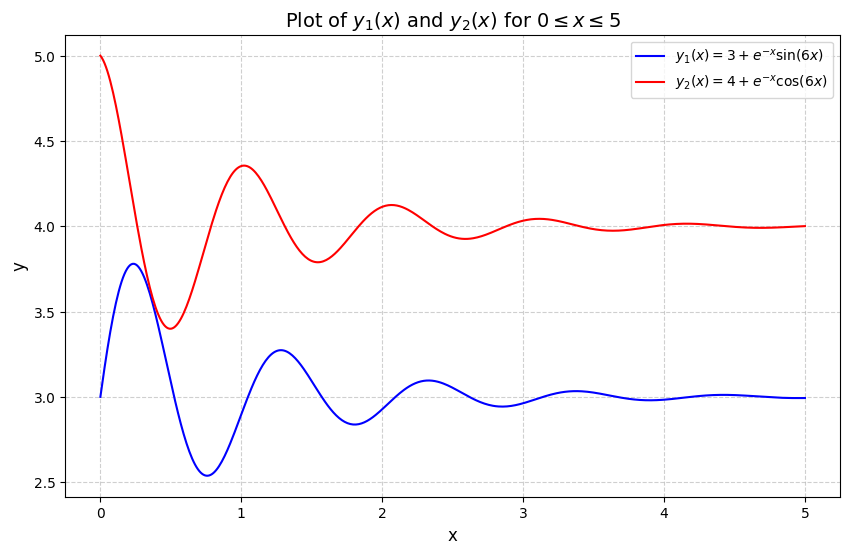

In [11]:
# Define the range of x
x = np.linspace(0, 5, 500)  # 500 points between 0 and 5

# Define the functions y1(x) and y2(x)
y1 = 3 + np.exp(-x) * np.sin(6 * x)
y2 = 4 + np.exp(-x) * np.cos(6 * x)

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot both functions
plt.plot(x, y1, label=r'$y_1(x) = 3 + e^{-x} \sin(6x)$', color='blue')
plt.plot(x, y2, label=r'$y_2(x) = 4 + e^{-x} \cos(6x)$', color='red')

# Add labels and title
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title(r'Plot of $y_1(x)$ and $y_2(x)$ for $0 \leq x \leq 5$', fontsize=14)

# Add a legend
plt.legend(fontsize=10)

# Show grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

# Plotting Functions in the $r\theta$-Plane
Although the plotting function is primarily designed for standard $xy$ graphs, it can be adapted for other types of plots.

- Plot the curve called deltoid, defined parametrically by the equations:
    $$
    x = 2 \cos \theta + \cos 2\theta, \quad y = 2 \sin \theta - \sin 2\theta,
    $$
    where $0 \leq \theta < 2\pi$. Take a set of $\theta$ values between zero and $2\pi$, calculate $x$ and $y$ for each using the equations above, and then plot $y$ as a function of $x$.
- To create a polar plot $r = f(\theta)$, you can compute $r$ for a range of $\theta$ values and then convert $r$ and $\theta$ to Cartesian coordinates using the standard equations $x = r \cos \theta$, $y = r \sin \theta$. Use this method to plot Galileo's spiral $r = \theta^2$ for $0 \leq \theta \leq 10\pi$.
- Using the same method, create a polar plot of the "Fey's function":
    $$
    r = e^{\cos \theta} - 2 \cos 4\theta + \sin^5 \left(\frac{\theta}{12}\right)
    $$
    in the range $0 \leq \theta \leq 24\pi$.


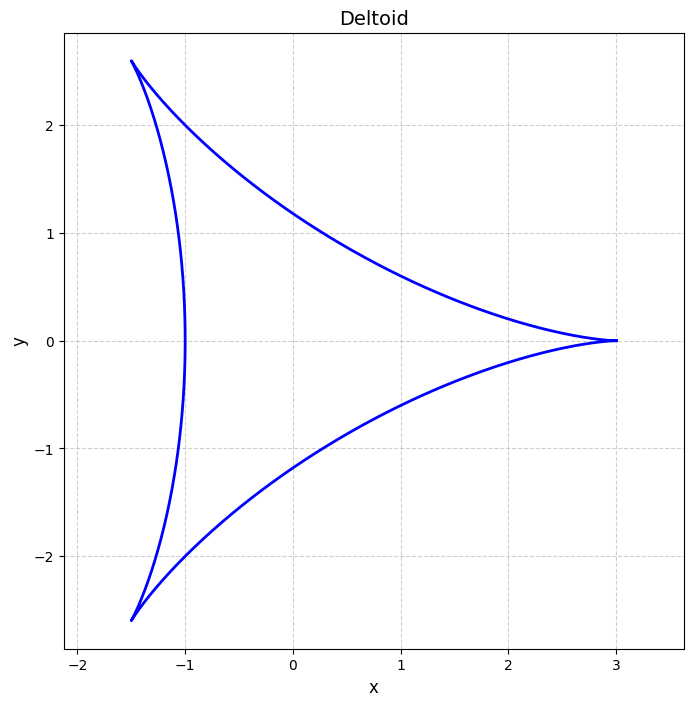

In [12]:
theta = np.linspace(0, 2*np.pi, 1000)
x = 2 * np.cos(theta) + np.cos(2 * theta)
y = 2 * np.sin(theta) - np.sin(2 * theta)

plt.figure(figsize=(8, 8))
plt.plot(x, y, color='blue', linewidth=2)
plt.title("Deltoid", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')  # Same scale on x and y axes
plt.show()

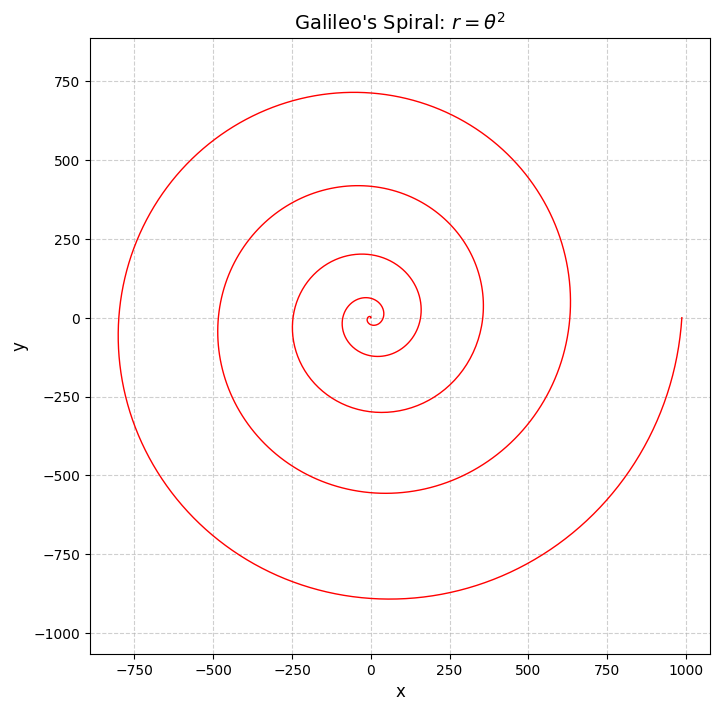

In [13]:
theta = np.linspace(0, 10*np.pi, 1000)
r = theta**2
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.figure(figsize=(8, 8))
plt.plot(x, y, color='red', linewidth=1)
plt.title("Galileo's Spiral: $r = \\theta^2$", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')
plt.show()

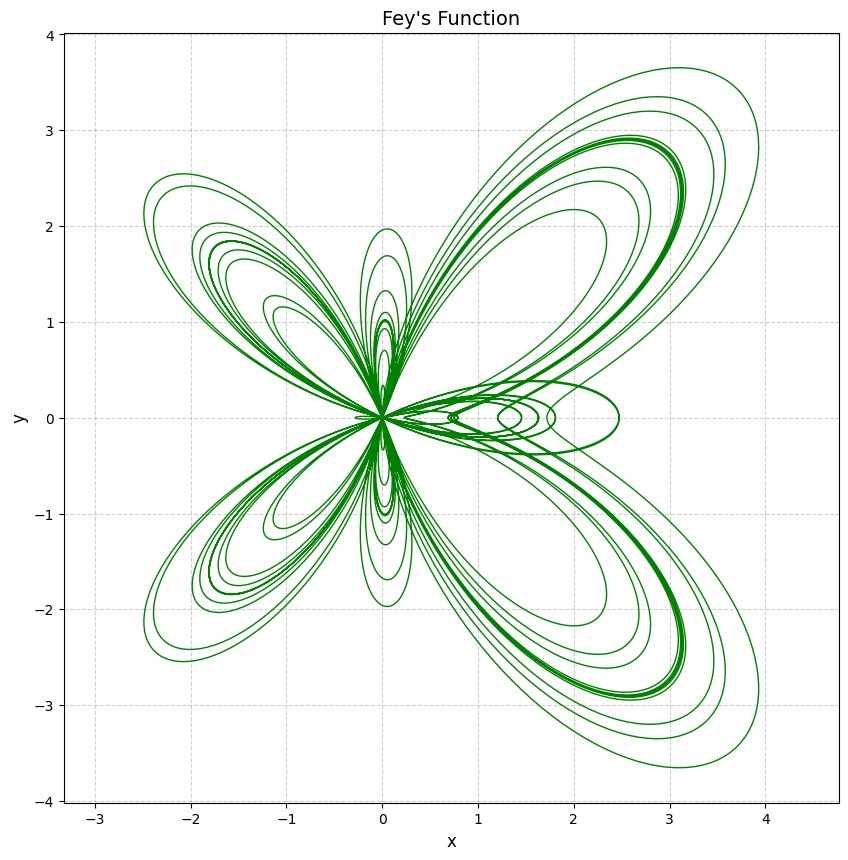

In [14]:
theta = np.linspace(0, 24*np.pi, 5000)
r = np.exp(np.cos(theta)) - 2 * np.cos(4 * theta) + np.sin(theta / 12)**5
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.figure(figsize=(10, 10))
plt.plot(x, y, color='green', linewidth=1)
plt.title("Fey's Function", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')
plt.show()

# Legendre Polynomials
The Legendre polynomials are of great importance in physics, especially in the solution of Laplace's equation in spherical coordinates. They are fundamental in the spherical harmonics expansion, which makes them essential in problems of quantum mechanics and electromagnetism. Each Legendre polynomial $P_n(x)$ is a polynomial of degree $n$. It can be expressed using Rodrigues' Formula:
     
$$
P_n (x)=\frac{1}{n!\ 2^n} \frac{d^n}{dx^n} (x^2-1)^n, \ \ n \in  \mathbb{Z^{+}}+\{0\}
$$
        
- Using Rodrigues' formula, find $P_0(x)$ and $P_1(x)$.
- Using the recurrence relation
    $$
    P_{j+1}(x)=\frac{(2j+1)x P_j (x)-jP_{j-1}(x)}{j+1},
    $$
    write code to calculate $P_n(x)$ for $n\geq2$.
- On a single graph, plot $P_n(x)$ for $1\leq n\leq5$.

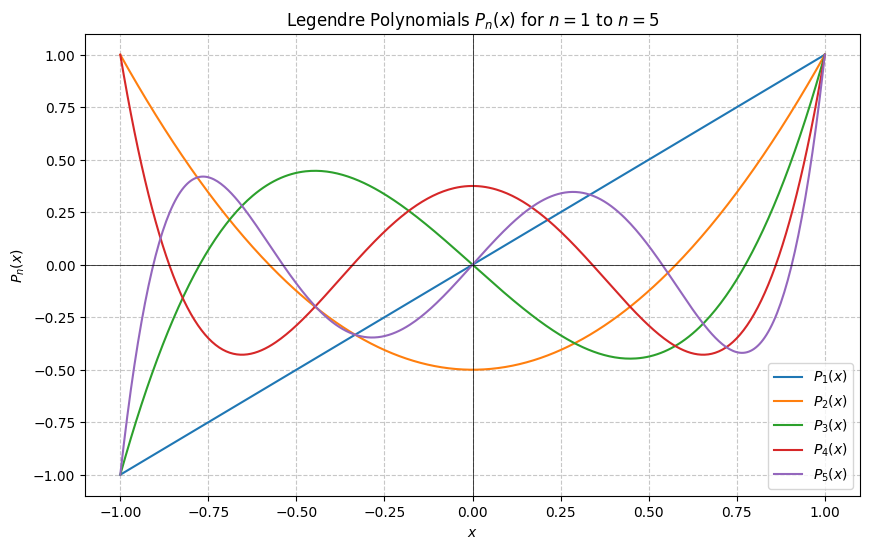

In [17]:
def legendre(n, x):
    if n == 0:
        return np.ones_like(x)  # P0(x) = 1
    elif n == 1:
        return x                 # P1(x) = x
    else:
        # Initialize P0 and P1
        P_prev = np.ones_like(x)  # P0
        P_current = x             # P1
        for j in range(1, n):
            # Apply the recurrence relation
            P_next = ((2*j + 1) * x * P_current - j * P_prev) / (j + 1)
            P_prev, P_current = P_current, P_next
        return P_current

# Range of x: [-1, 1] (natural domain of Legendre polynomials)
x = np.linspace(-1, 1, 400)

# Plot P1(x) to P5(x)
plt.figure(figsize=(10, 6))
for n in range(1, 6):
    y = legendre(n, x)
    plt.plot(x, y, label=f'$P_{n}(x)$')

# Graph configuration
plt.title('Legendre Polynomials $P_n(x)$ for $n=1$ to $n=5$')
plt.xlabel('$x$')
plt.ylabel('$P_n(x)$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()